# 🧩 Dataset 5: *House Prices*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Reading

In [2]:
housing_dataset = pd.read_csv('../data/housing.csv')
housing_dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
housing_dataset.describe(include='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [5]:
categorical_cols = [col for col in housing_dataset.columns if housing_dataset[col].dtype == 'object']
numerical_cols = [col for col in housing_dataset.columns if housing_dataset[col].dtype == 'int64']
len(categorical_cols), len(numerical_cols)

(7, 6)

## correlation with price

In [6]:
def plot_bar_for_corr_matrix(corr_matrix):
    corr_values_with_price = corr_matrix.loc['price', 'area':]
    plt.bar(corr_values_with_price.index, corr_values_with_price)
    plt.xlabel('cols')
    plt.ylabel('correlated value with price')
    plt.title('correlation of cols with price')
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.show()
    return corr_values_with_price

In [7]:
corr_matrix = housing_dataset.corr(numeric_only=True)
corr_matrix

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


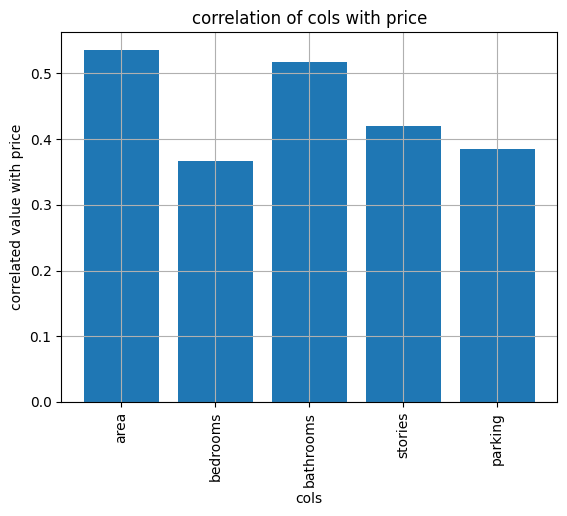

area         0.535997
bedrooms     0.366494
bathrooms    0.517545
stories      0.420712
parking      0.384394
Name: price, dtype: float64

In [8]:
plot_bar_for_corr_matrix(corr_matrix)

<Axes: xlabel='area', ylabel='price'>

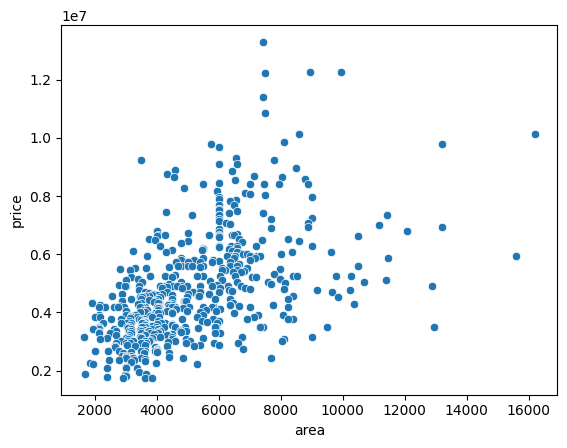

In [9]:
sns.scatterplot(housing_dataset, x='area', y='price')

## Feature Transformation 

In [10]:
# mean of all features
housing_dataset.describe().loc['mean', :].round(2)

price        4766729.25
area            5150.54
bedrooms           2.97
bathrooms          1.29
stories            1.81
parking            0.69
Name: mean, dtype: float64

### Logarithmic Transformation

In [11]:
# we consider are is highly inflated for that to balance the data
housing_dataset_log = housing_dataset.copy()
housing_dataset_log['area']=np.log10(housing_dataset_log['area'])

In [12]:
housing_dataset_log.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,3.870404,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,3.952308,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,3.998259,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,3.875061,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,3.870404,4,1,2,yes,yes,yes,no,yes,2,no,furnished


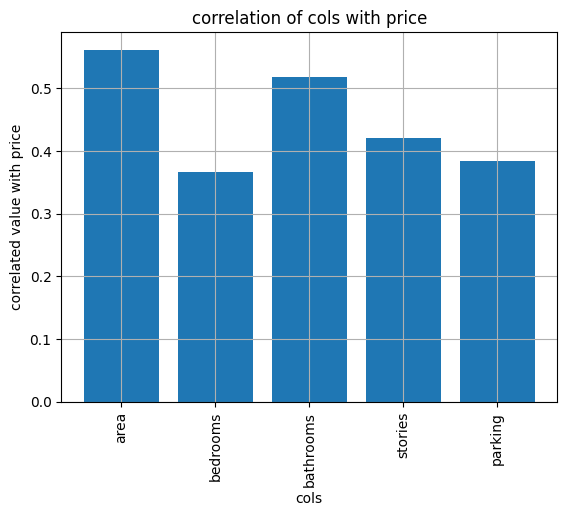

area         0.561231
bedrooms     0.366494
bathrooms    0.517545
stories      0.420712
parking      0.384394
Name: price, dtype: float64

In [13]:
corr_matrix = housing_dataset_log.corr(numeric_only=True)
plot_bar_for_corr_matrix(corr_matrix)

### Normalization(Min Max Transformation)
Formula: x` = (x-xmin)/(xmax-xmin)

In [14]:
housing_dataset_min_max = housing_dataset.copy()
min_area = housing_dataset['area'].min()
max_area = housing_dataset['area'].max()
housing_dataset_min_max['area'] = housing_dataset['area'].apply(lambda x: (x-min_area)/(max_area-min_area))
housing_dataset_min_max.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,0.396564,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,0.502405,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,0.571134,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,0.402062,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,0.396564,4,1,2,yes,yes,yes,no,yes,2,no,furnished


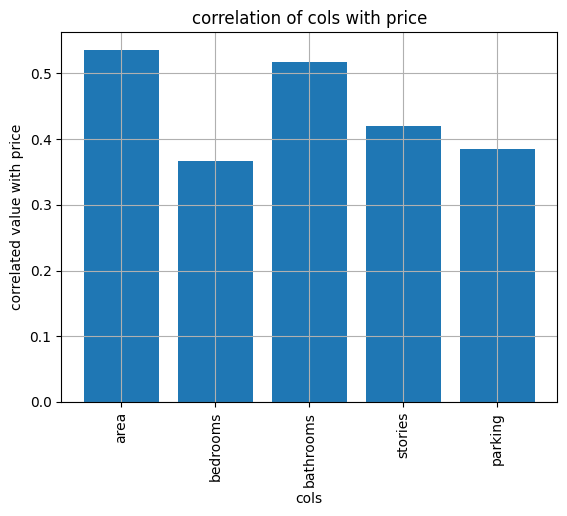

area         0.535997
bedrooms     0.366494
bathrooms    0.517545
stories      0.420712
parking      0.384394
Name: price, dtype: float64

In [15]:
corr_matrix = housing_dataset_min_max.corr(numeric_only=True)
plot_bar_for_corr_matrix(corr_matrix)

### Encoding of categorical columns
we will use housing_dataset_min_max dataset

#### we will use one hot encoding(get dummies) for the cols ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [16]:
encoded_housing_dataset_min_max = pd.get_dummies(housing_dataset_min_max, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], sparse=True, dtype=int)
housing_dataset_min_max.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,0.396564,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,0.502405,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,0.571134,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,0.402062,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,0.396564,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### we will use cat encoding for furnishingstatus col

In [17]:
def encoding_furnishing_status(status):
    if status == 'furnished':
        return 3
    elif status == 'semi-furnished':
        return 2
    else:
        return 1
encoded_housing_dataset_min_max['furnishingstatus'] = encoded_housing_dataset_min_max['furnishingstatus'].apply(encoding_furnishing_status)
encoded_housing_dataset_min_max.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,0.396564,4,2,3,2,3,0,1,1,0,1,0,1,0,0,1,0,1
1,12250000,0.502405,4,4,4,3,3,0,1,1,0,1,0,1,0,0,1,1,0
2,12250000,0.571134,3,2,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1
3,12215000,0.402062,4,2,2,3,3,0,1,1,0,0,1,1,0,0,1,0,1
4,11410000,0.396564,4,1,2,2,3,0,1,0,1,0,1,1,0,0,1,1,0


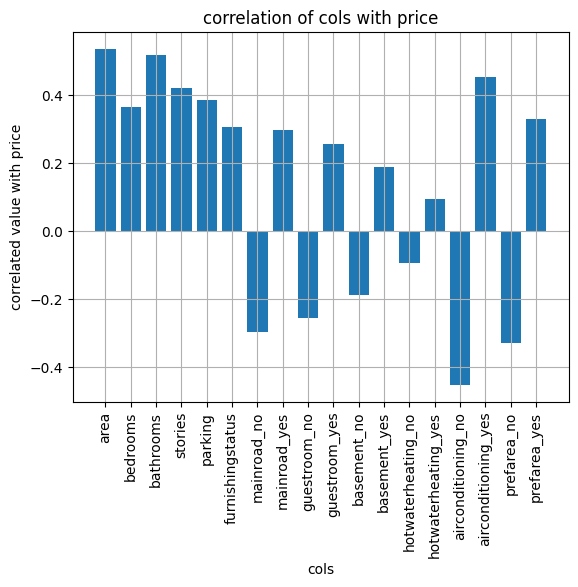

area                   0.535997
bedrooms               0.366494
bathrooms              0.517545
stories                0.420712
parking                0.384394
furnishingstatus       0.304721
mainroad_no           -0.296898
mainroad_yes           0.296898
guestroom_no          -0.255517
guestroom_yes          0.255517
basement_no           -0.187057
basement_yes           0.187057
hotwaterheating_no    -0.093073
hotwaterheating_yes    0.093073
airconditioning_no    -0.452954
airconditioning_yes    0.452954
prefarea_no           -0.329777
prefarea_yes           0.329777
Name: price, dtype: float64

In [18]:
corr_matrix = encoded_housing_dataset_min_max.corr(numeric_only=True)
plot_bar_for_corr_matrix(corr_matrix)

## Outlier treatment using IQR for numerical cols

In [19]:
outliers_indices = set()
for col in numerical_cols:
    Q1 = encoded_housing_dataset_min_max[col].quantile(0.25)
    Q3 = encoded_housing_dataset_min_max[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - (1.5 * IQR)
    upper_fence = Q3 + (1.5 * IQR)
    outliers = encoded_housing_dataset_min_max[(encoded_housing_dataset_min_max[col] < lower_fence) | (encoded_housing_dataset_min_max[col] > upper_fence)].index
    outliers_indices.update(outliers)

In [20]:
encoded_housing_dataset_min_max = encoded_housing_dataset_min_max[~encoded_housing_dataset_min_max.index.isin(outliers_indices)]
len(encoded_housing_dataset_min_max)

463

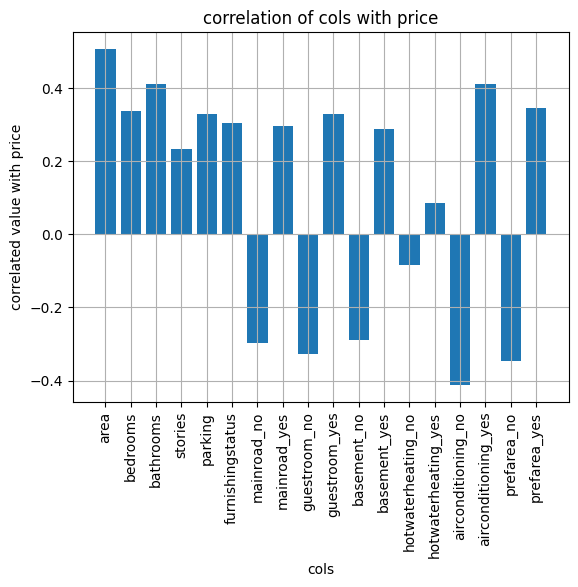

area                   0.506596
bedrooms               0.337368
bathrooms              0.410914
stories                0.233379
parking                0.328241
furnishingstatus       0.302910
mainroad_no           -0.296586
mainroad_yes           0.296586
guestroom_no          -0.328228
guestroom_yes          0.328228
basement_no           -0.288528
basement_yes           0.288528
hotwaterheating_no    -0.084735
hotwaterheating_yes    0.084735
airconditioning_no    -0.411579
airconditioning_yes    0.411579
prefarea_no           -0.345902
prefarea_yes           0.345902
Name: price, dtype: float64

In [21]:
corr_matrix = encoded_housing_dataset_min_max.corr(numeric_only=True)
plt.xticks(rotation=90)
plot_bar_for_corr_matrix(corr_matrix)

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = encoded_housing_dataset_min_max.select_dtypes(include=[np.number]).drop('price', axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data.sort_values(by="VIF", ascending=False)


c:\PYTHON_ENV\myenv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\PYTHON_ENV\myenv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\PYTHON_ENV\myenv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\PYTHON_ENV\myenv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\PYTHON_ENV\myenv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\PYTHON_ENV\myenv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered

,feature,VIF
8,guestroom_no,inf
9,guestroom_yes,inf
14,airconditioning_no,inf
15,airconditioning_yes,inf
7,mainroad_yes,inf
6,mainroad_no,inf
13,hotwaterheating_yes,inf
12,hotwaterheating_no,inf
11,basement_yes,inf
10,basement_no,inf


# 🧩 Dataset 6: *COVID-19 Global Dataset*

In [24]:
covid19_dataset = pd.read_csv('../data/WHO-COVID-19-global-daily-data.csv', parse_dates=['Date_reported'])
covid19_dataset.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-04,AF,Afghanistan,EMR,NaN,0,NaN,0
1,2020-01-04,DZ,Algeria,AFR,NaN,0,NaN,0
2,2020-01-04,AL,Albania,EUR,NaN,0,NaN,0
3,2020-01-04,AI,Anguilla,AMR,NaN,0,NaN,0
4,2020-01-04,AS,American Samoa,WPR,0.0,0,0.0,0


In [25]:
covid19_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502800 entries, 0 to 502799
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_reported      502800 non-null  datetime64[ns]
 1   Country_code       500705 non-null  object        
 2   Country            502800 non-null  object        
 3   WHO_region         502800 non-null  object        
 4   New_cases          211220 non-null  float64       
 5   Cumulative_cases   502800 non-null  int64         
 6   New_deaths         154273 non-null  float64       
 7   Cumulative_deaths  502800 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 30.7+ MB


In [31]:
covid19_dataset.describe(include='all').round(1)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,502800,500705,502800,502800,211220.0,502800.0,154273.0,502800.0
unique,NaN,239,240,7,NaN,NaN,NaN,NaN
top,NaN,AF,Afghanistan,EUR,NaN,NaN,NaN,NaN
freq,NaN,2095,2095,129890,NaN,NaN,NaN,NaN
mean,2022-11-16 00:00:00.000000256,NaN,NaN,NaN,3686.9,2076665.5,46.0,21887.1
min,2020-01-04 00:00:00,NaN,NaN,NaN,-65079.0,0.0,-3520.0,0.0
25%,2021-06-10 00:00:00,NaN,NaN,NaN,3.0,6771.0,0.0,41.0
50%,2022-11-16 00:00:00,NaN,NaN,NaN,60.0,62488.0,2.0,706.0
75%,2024-04-23 00:00:00,NaN,NaN,NaN,672.0,664972.8,15.0,8011.2
max,2025-09-28 00:00:00,NaN,NaN,NaN,6966046.0,103436829.0,44047.0,1228289.0


In [32]:
covid19_dataset.isnull().sum()

Date_reported             0
Country_code           2095
Country                   0
WHO_region                0
New_cases            291580
Cumulative_cases          0
New_deaths           348527
Cumulative_deaths         0
dtype: int64

In [37]:
covid19_dataset[pd.isnull(covid19_dataset['Country_code'])]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
142,2020-01-04,NaN,Namibia,AFR,NaN,0,NaN,0
342,2020-01-05,NaN,Namibia,AFR,NaN,0,NaN,0
626,2020-01-06,NaN,Namibia,AFR,NaN,0,NaN,0
822,2020-01-07,NaN,Namibia,AFR,NaN,0,NaN,0
1106,2020-01-08,NaN,Namibia,AFR,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...
501746,2025-09-24,NaN,Namibia,AFR,NaN,172557,NaN,4110
501942,2025-09-25,NaN,Namibia,AFR,NaN,172557,NaN,4110
502222,2025-09-26,NaN,Namibia,AFR,NaN,172557,NaN,4110
502426,2025-09-27,NaN,Namibia,AFR,NaN,172557,NaN,4110


## Handlind duplicates
* Fill Country code with respective country 
* new_cases and new_deaths with 0

In [40]:
mapping_country_codes = {x:y for x, y in zip(covid19_dataset['Country'], covid19_dataset['Country_code']) if y != np.nan}
print(mapping_country_codes)
print(mapping_country_codes['Namibia'])

{'Afghanistan': 'AF', 'Algeria': 'DZ', 'Albania': 'AL', 'Anguilla': 'AI', 'American Samoa': 'AS', 'Armenia': 'AM', 'Antigua and Barbuda': 'AG', 'Azerbaijan': 'AZ', 'Andorra': 'AD', 'Austria': 'AT', 'Aruba': 'AW', 'Bahamas': 'BS', 'Angola': 'AO', 'Belgium': 'BE', 'Bhutan': 'BT', 'Bahrain': 'BH', 'Argentina': 'AR', 'Bermuda': 'BM', 'Bosnia and Herzegovina': 'BA', 'Bangladesh': 'BD', 'Australia': 'AU', 'Bonaire, Sint Eustatius and Saba': 'BQ', 'British Virgin Islands': 'VG', 'Barbados': 'BB', 'Belarus': 'BY', 'Brunei Darussalam': 'BN', 'Cameroon': 'CM', 'Brazil': 'BR', 'Belize': 'BZ', 'Bulgaria': 'BG', 'International conveyance (Solomon Islands)': 'XG', 'Canada': 'CA', 'Benin': 'BJ', 'Burkina Faso': 'BF', 'Chile': 'CL', 'Cayman Islands': 'KY', 'Bolivia (Plurinational State of)': 'BO', 'Burundi': 'BI', 'China': 'CN', 'International commercial vessel': 'XL', 'Botswana': 'BW', 'Cambodia': 'KH', 'Côte d’Ivoire': 'CI', 'Colombia': 'CO', 'Cabo Verde': 'CV', 'Chad': 'TD', 'Cuba': 'CU', 'Comoros'

In [42]:
def get_country_code(country):
    if country == 'Namibia':
        return 'NA'
    return mapping_country_codes.get(country, 'Unknown')

covid19_dataset['Country_code'] = covid19_dataset['Country_code'].fillna(covid19_dataset['Country'].map(get_country_code))

In [45]:
covid19_dataset['New_cases'] = covid19_dataset['New_cases'].fillna(0)
covid19_dataset['New_deaths'] = covid19_dataset['New_deaths'].fillna(0)
covid19_dataset.isnull().sum()

Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [51]:
countries_by_death = covid19_dataset.groupby('Country')['New_deaths'].sum().sort_values(ascending=False)
(countries_by_death)

Country
United States of America    1228289.0
Brazil                       703324.0
India                        533847.0
Russian Federation           404290.0
Mexico                       335041.0
                              ...    
Niue                              0.0
Pitcairn                          0.0
Saint Helena                      0.0
Turkmenistan                      0.0
Tokelau                           0.0
Name: New_deaths, Length: 240, dtype: float64

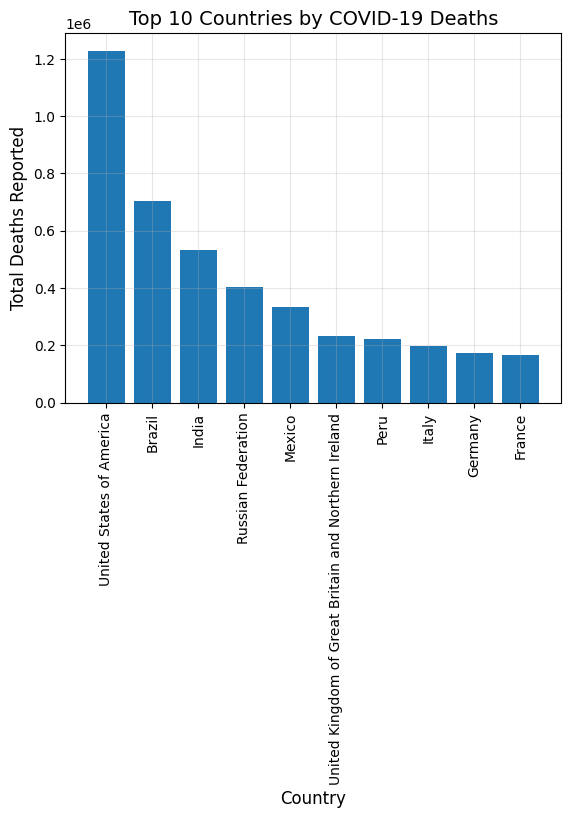

In [65]:
plt.bar(x=countries_by_death.index[:10], height=countries_by_death[:10])
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Deaths Reported', fontsize=12)
plt.title('Top 10 Countries by COVID-19 Deaths', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
plt.show()

In [66]:
covid19_dataset['year'] = covid19_dataset['Date_reported'].dt.year

In [67]:
covid19_dataset.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,year
0,2020-01-04,AF,Afghanistan,EMR,0.0,0,0.0,0,2020
1,2020-01-04,DZ,Algeria,AFR,0.0,0,0.0,0,2020
2,2020-01-04,AL,Albania,EUR,0.0,0,0.0,0,2020
3,2020-01-04,AI,Anguilla,AMR,0.0,0,0.0,0,2020
4,2020-01-04,AS,American Samoa,WPR,0.0,0,0.0,0,2020


In [68]:
group_by_year_deaths = covid19_dataset.groupby('year')['New_deaths'].sum()
group_by_year_deaths

year
2020    1936752.0
2021    3537358.0
2022    1246156.0
2023     293849.0
2024      68877.0
2025      19644.0
Name: New_deaths, dtype: float64

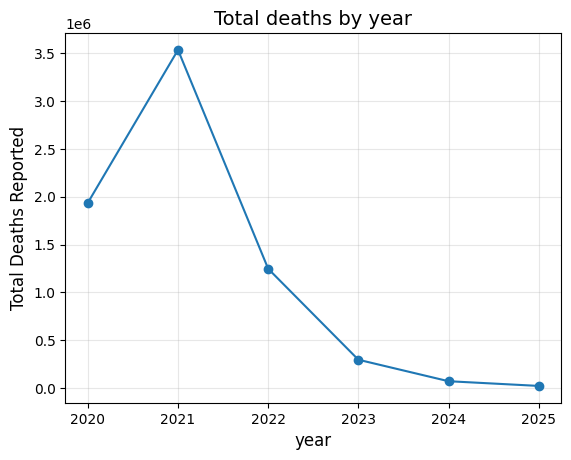

In [72]:
plt.plot(group_by_year_deaths.index, group_by_year_deaths, marker='o')
plt.xlabel('year', fontsize=12)
plt.ylabel('Total Deaths Reported', fontsize=12)
plt.title('Total deaths by year', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

In [75]:
group_by_country = covid19_dataset.groupby('Country')
(group_by_country.groups)

{'Afghanistan': [0, 464, 480, 944, 960, 1420, 1444, 1900, 1924, 2380, 2404, 2860, 2884, 3340, 3364, 3820, 3844, 4300, 4320, 4784, 4800, 5264, 5280, 5744, 5760, 6224, 6244, 6700, 6724, 7180, 7204, 7660, 7684, 8140, 8164, 8624, 8640, 9104, 9120, 9580, 9604, 10060, 10084, 10540, 10564, 11020, 11044, 11500, 11524, 11980, 12004, 12456, 12488, 12936, 12968, 13416, 13448, 13896, 13928, 14376, 14404, 14860, 14884, 15340, 15364, 15820, 15844, 16300, 16320, 16784, 16800, 17264, 17280, 17744, 17760, 18224, 18244, 18700, 18724, 19180, 19204, 19664, 19680, 20144, 20160, 20624, 20640, 21104, 21120, 21580, 21604, 22060, 22084, 22540, 22564, 23020, 23044, 23504, 23520, 23984, ...], 'Albania': [2, 476, 482, 956, 962, 1434, 1442, 1914, 1922, 2394, 2406, 2874, 2886, 3354, 3366, 3836, 3842, 4316, 4322, 4796, 4802, 5276, 5282, 5754, 5762, 6234, 6246, 6714, 6726, 7194, 7206, 7676, 7682, 8156, 8162, 8636, 8642, 9116, 9122, 9594, 9602, 10074, 10082, 10554, 10566, 11034, 11046, 11516, 11522, 11996, 12002, 1247

In [77]:
India = group_by_country.get_group('India')
India.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,year
111,2020-01-04,IN,India,SEAR,0.0,0,0.0,0,2020
427,2020-01-05,IN,India,SEAR,0.0,0,0.0,0,2020
587,2020-01-06,IN,India,SEAR,0.0,0,0.0,0,2020
907,2020-01-07,IN,India,SEAR,0.0,0,0.0,0,2020
1067,2020-01-08,IN,India,SEAR,0.0,0,0.0,0,2020


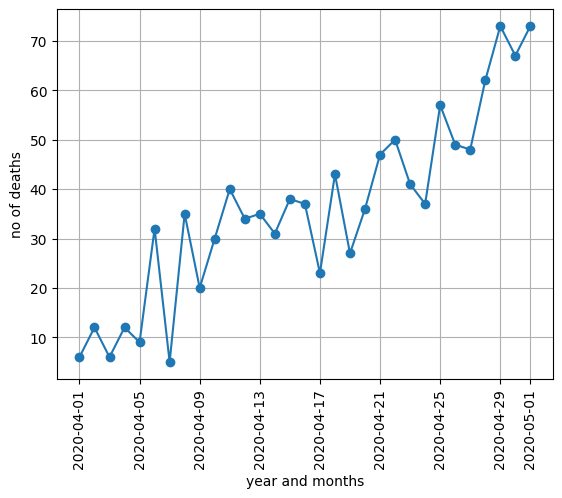

In [ ]:
plt.plot(
    India[(India['Date_reported'] <= '2020-05') & (India['Date_reported'] >= '2020-04') ]['Date_reported'], 
    India[(India['Date_reported'] <= '2020-05') & (India['Date_reported'] >= '2020-04') ]['New_deaths'], 
    marker=  'o'
) # if we want we can change year and country here
plt.xlabel('year and months')
plt.ylabel('no of deaths')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

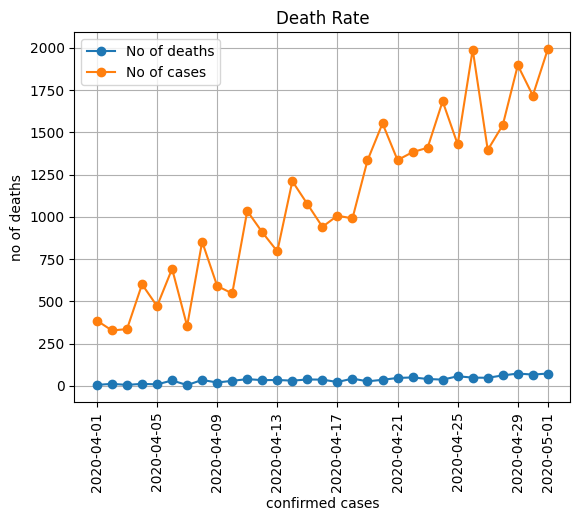

In [112]:
plt.plot(
    India[(India['Date_reported'] <= '2020-05') & (India['Date_reported'] >= '2020-04') ]['Date_reported'], 
    India[(India['Date_reported'] <= '2020-05') & (India['Date_reported'] >= '2020-04') ]['New_deaths'], 
    marker=  'o',
    label = 'No of deaths'
) # if we want we can change year and country here
plt.plot(
    India[(India['Date_reported'] <= '2020-05') & (India['Date_reported'] >= '2020-04') ]['Date_reported'], 
    India[(India['Date_reported'] <= '2020-05') & (India['Date_reported'] >= '2020-04') ]['New_cases'], 
    marker=  'o',
    label = 'No of cases'
) # if we want we can change year and country here
plt.xlabel('confirmed cases')
plt.ylabel('no of deaths')
plt.title('Death Rate')
plt.grid(True)
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [84]:
group_by_continent = covid19_dataset.groupby('WHO_region')['New_deaths'].sum()
group_by_continent

WHO_region
AFR       175532.0
AMR      3062713.0
EMR       351975.0
EUR      2281378.0
OTHER         13.0
SEAR      647280.0
WPR       583745.0
Name: New_deaths, dtype: float64

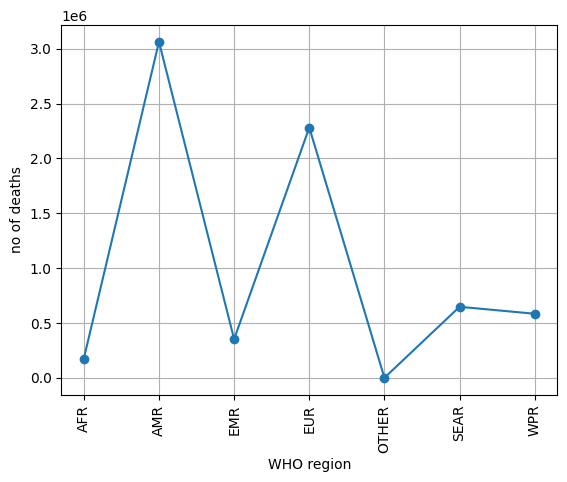

In [99]:
plt.plot(
    group_by_continent.index,
    group_by_continent,
    marker=  'o'
) # if we want we can change year and country here
plt.xlabel('WHO region')
plt.ylabel('no of deaths')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [104]:
covid19_dataset['month']

0         2020-01
1         2020-01
2         2020-01
3         2020-01
4         2020-01
           ...   
502795    2025-09
502796    2025-09
502797    2025-09
502798    2025-09
502799    2025-09
Name: month, Length: 502800, dtype: period[M]